Importing Libraries

In [186]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Using Kaggle API to download dataset

In [187]:
!kaggle datasets download -d CooperUnion/anime-recommendations-database

anime-recommendations-database.zip: Skipping, found more recently modified local copy (use --force to force download)


Preprocessing Data

In [188]:
anime = pd.read_csv('/Users/shiwa/Downloads/anime-recommendations-database/anime.csv')

In [189]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [190]:
anime.shape

(12294, 7)

In [191]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [192]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [193]:
user = pd.read_csv('/Users/shiwa/Downloads/anime-recommendations-database/rating.csv')

In [194]:
user = user[user["rating"] != -1]

In [195]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337241 entries, 47 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 193.4 MB


In [196]:
user.describe()

,user_id,anime_id,rating
count,6.337241e+06,6.337241e+06,6.337241e+06
mean,3.674791e+04,8.902866e+03,7.808497e+00
std,2.101340e+04,8.882000e+03,1.572496e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.898400e+04,1.239000e+03,7.000000e+00
50%,3.681500e+04,6.213000e+03,8.000000e+00
75%,5.487300e+04,1.407500e+04,9.000000e+00
max,7.351600e+04,3.447500e+04,1.000000e+01


In [197]:
user.shape

(6337241, 3)

In [198]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [199]:
anime = anime.drop(list(anime.loc[anime["rating"].isnull() == True].index), axis = 0)
anime = anime.fillna("Unknown")
anime = anime.reset_index(drop = True)

In [200]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

Visualizing Data

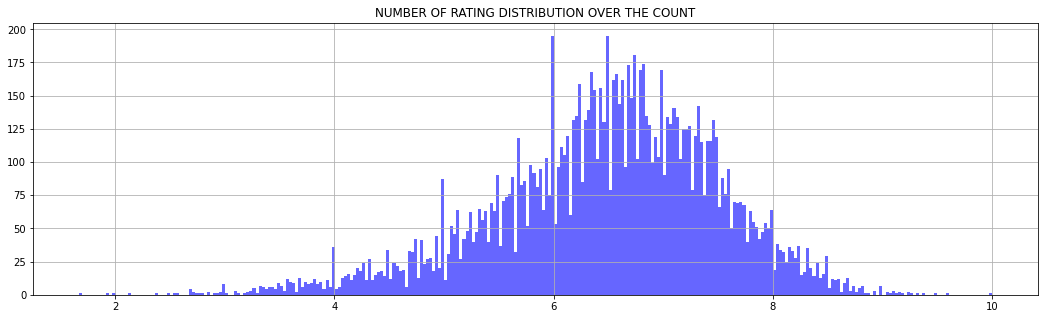

In [201]:
plt.figure(figsize=(18,5))
anime['rating'].hist(bins=300,color='b',alpha=0.6)
plt.title('NUMBER OF RATING DISTRIBUTION OVER THE COUNT')
plt.show()

In [202]:
anime['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Action, Comedy, Hentai, Romance, Supernatural',
       'Hentai, Sports', 'Hentai, Slice of Life'], dtype=object)

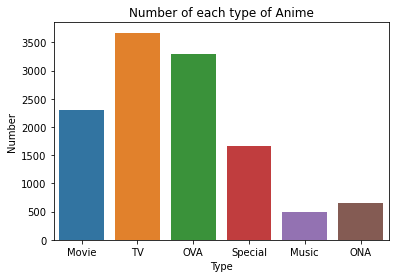

In [203]:
sns.countplot(data = anime, x = "type")
plt.title("Number of each type of Anime")
plt.xlabel("Type")
plt.ylabel("Number")
plt.show()

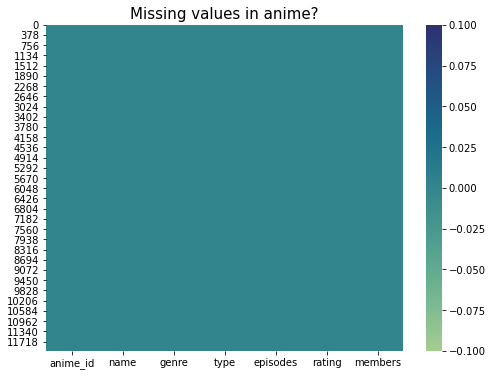

In [204]:
plt.figure(figsize=(8,6))
sns.heatmap(anime.isnull(),cmap='crest')
plt.title("Missing values in anime?", fontsize = 15)
plt.show()

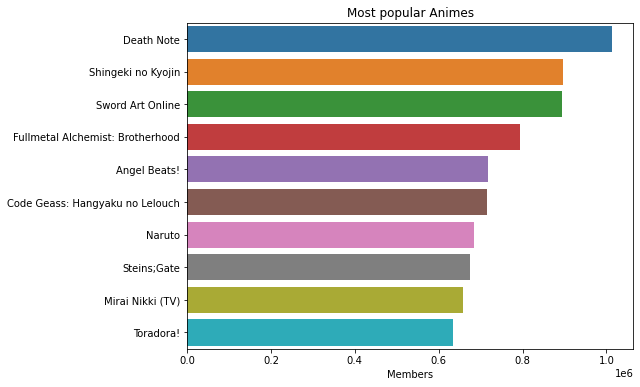

In [205]:
plt.figure(figsize = (8,6))
df_members = anime.sort_values(by = "members", ascending = False).copy()
sns.barplot(data = df_members.iloc[0:10], y = "name", x = "members")
plt.title("Most popular Animes", size = 12)
plt.xlabel("Members")
plt.ylabel("")
plt.show()

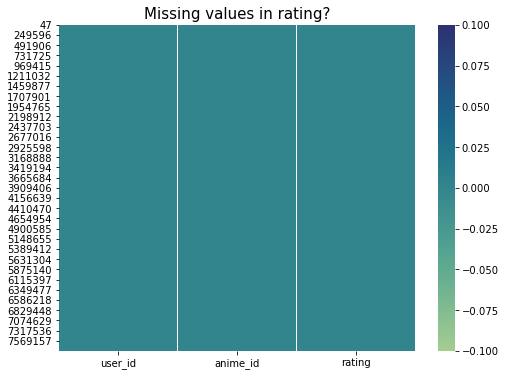

In [206]:
plt.figure(figsize=(8,6))
sns.heatmap(user.isnull(),cmap='crest')
plt.title("Missing values in rating?", fontsize = 15)
plt.show()

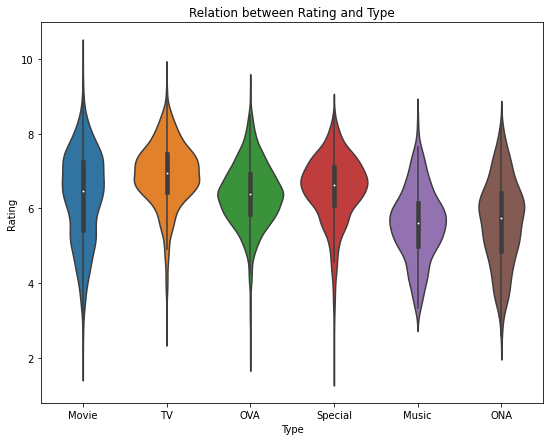

In [207]:
plt.figure(figsize = (9,7))
sns.violinplot(data = anime, x = "type", y = "rating")
plt.title("Relation between Rating and Type", size = 12)
plt.xlabel("Type")
plt.ylabel("Rating")
plt.show()

In [208]:
df = pd.merge(user,anime[["anime_id","name"]], left_on = "anime_id", right_on = "anime_id").drop("anime_id", axis = 1)
df.head()

,user_id,rating,name
0,1,10,Highschool of the Dead
1,3,6,Highschool of the Dead
2,5,2,Highschool of the Dead
3,12,6,Highschool of the Dead
4,14,6,Highschool of the Dead


In [209]:
count_rating = df.groupby("name")["rating"].count().sort_values(ascending = False)
count_rating

name
Death Note                                         34226
Sword Art Online                                   26310
Shingeki no Kyojin                                 25290
Code Geass: Hangyaku no Lelouch                    24126
Angel Beats!                                       23565
                                                   ...  
Kyoufu Shinbun                                         1
Tsukiyomi                                              1
Pyuu to Fuku! Jaguar                                   1
Ichigo Ichie: Kimi no Kotoba                           1
Kero Kero Keroppi no Kero Kero House no Himitsu        1
Name: rating, Length: 9924, dtype: int64

In [210]:
# Some have only 1 rating, therefore it is better for the recommender system to ignore them
# We will keep only the animes with at least r ratings
r = 2000
more_than_r_ratings = count_rating[count_rating.apply(lambda x: x >= r)].index

# Keep only the animes with at least r ratings in the DataFrame
df_r = df[df['name'].apply(lambda x: x in more_than_r_ratings)]

In [211]:
before = len(df.name.unique())
after = len(df_r.name.unique())
rows_before = df.shape[0]
rows_after = df_r.shape[0]
print(f'''There are {before} animes in the dataset before filtering and {after} animes after the filtering.

{before} animes => {after} animes
{rows_before} rows before filtering => {rows_after} rows after filtering''')

There are 9924 animes in the dataset before filtering and 861 animes after the filtering.

9924 animes => 861 animes
6337234 rows before filtering => 4335993 rows after filtering


In [212]:
# Create a matrix with userId as rows and the titles of the movies as column.
# Each cell will have the rating given by the user to the animes.
# There will be a lot of NaN values, because each user hasn't watched most of the animes
df_recom = df_r.pivot_table(index='user_id',columns='name',values='rating')
df_recom.iloc[:5,:5]

name,.hack//Sign,07-Ghost,11eyes,Aa! Megami-sama! (TV),Absolute Duo
user_id,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,2.0
7,NaN,NaN,NaN,NaN,8.0


In [213]:
df_r.name.value_counts().head(10)

Death Note                            34226
Sword Art Online                      26310
Shingeki no Kyojin                    25290
Code Geass: Hangyaku no Lelouch       24126
Angel Beats!                          23565
Elfen Lied                            23528
Naruto                                22071
Fullmetal Alchemist: Brotherhood      21494
Fullmetal Alchemist                   21332
Code Geass: Hangyaku no Lelouch R2    21124
Name: name, dtype: int64

Creating a Function to check correlation

In [216]:
def find_corr(df, name):
    similar_to_movie = df.corrwith(df[name])
    similar_to_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    similar_to_movie = similar_to_movie.sort_values(by = 'Correlation', ascending = False)
    return similar_to_movie

In [222]:
# Trying an anime
anime1 = 'Death Note'
# Recommendations
find_corr(df_recom, anime1).head(10)

,Correlation
name,
Death Note,1.000000
Death Note Rewrite,0.485444
Code Geass: Hangyaku no Lelouch R2,0.358927
Code Geass: Hangyaku no Lelouch,0.351290
Shingeki no Kyojin,0.346770
Naruto,0.313676
Final Fantasy VII: Advent Children,0.305436
Mobile Suit Gundam 00 Second Season,0.303306
One Outs,0.301941


In [218]:
# Trying an anime
anime2 = 'Doraemon'
# Recommendations
find_corr(df_recom, anime1).head(10)

,Correlation
name,
Death Note,1.000000
Death Note Rewrite,0.485444
Code Geass: Hangyaku no Lelouch R2,0.358927
Code Geass: Hangyaku no Lelouch,0.351290
Shingeki no Kyojin,0.346770
Naruto,0.313676
Final Fantasy VII: Advent Children,0.305436
Mobile Suit Gundam 00 Second Season,0.303306
One Outs,0.301941


## Thank You